<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/Supervised_ML_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION USING SUPERVISED MACHINE LEARNING 

## INTRODUCTION 

In this project I will be doing a prediction of scores based on their hours of study using simple linear regression in supervised machine learning. supervised machine learning basically means approach for issues where the data at hand consists of samples with labels, which means that each data point has attributes (covariates) and a corresponding label. Based on sample input-output pairs, supervised learning algorithms aim to learn a function that maps feature vectors (inputs) to labels (outputs), From labelled training data made up of a collection of training samples, it infers a function.

### Importing Necessary packages and datas 

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/INTERNSHIP/GIRP 23/SLR_data.csv')

## EXPLORATORY DATA ANALYSIS 

In [4]:
df.shape

(25, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**when the student sepends 4.8 Hours for studying they are getting the Score of 51.48** 

In [37]:
cor_df = df.corr()

cor_df

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**The correlation between the Hours and Scores are Highly correlated**

Text(0.5, 1.0, 'Ralationship between Hours and Scores')

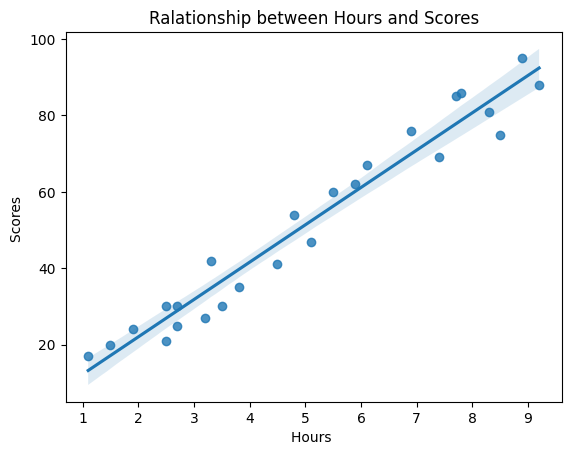

In [43]:
sns.regplot(x = df[['Hours ']] , y = df[['Scores ']] , data  = df)
plt.title('Ralationship between Hours and Scores')

**From this scatter plot we can find that the Hourse and Scores are positively related** 

# MODEL DEVELOPMENT 

In [29]:
x =  df[['Hours ']]
y = df[['Scores ']]

In [30]:
#Spliting the model for training and testing the data 
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [31]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Intercept :' , lm.intercept_)
print('Coefficient :' , lm.coef_)

Intercept : [2.37081538]
Coefficinet : [[9.78856669]]


From the above Intercept and coefficient the final model is 

**Scores  = 2.37081538 + (9.78856669 * Hours )**

This model explians that even when there is no change in the Hours of study the score is 2.37081538 and the Score changes 9.78856669 time when there is increase in Hours of Study.


In [40]:
yhat  = lm.predict(x_test)
print(yhat)

[[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


In [53]:
print({'Actual': y_test , 'Predicted' : yhat})

{'Actual':     Scores 
5        20
2        27
19       69
16       30
11       62
22       35
17       24
24       86, 'Predicted': array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])}


## MODEL EVALUATION 

Text(0.5, 1.0, 'Residual plot of Y Actual and Y Predicted')

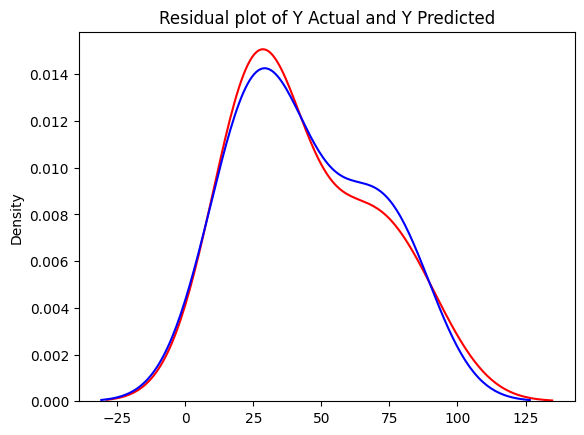

In [44]:
#comparing the predicted values with actual values

axl = sns.distplot(y_test , hist = False , color = 'r')
sns.distplot(yhat , hist= False , color = 'b' , ax= axl)
plt.title('Residual plot of Y Actual and Y Predicted')

In [17]:
rsqr = lm.score(x,y)
print('Rsquared :', rsqr)

Rsquared : 0.9529426789332803


In [18]:
mean_squared_error(yhat , y_test)

22.965097212700428

Text(0.5, 1.0, 'Relationship of Y Actual and Y Predicted')

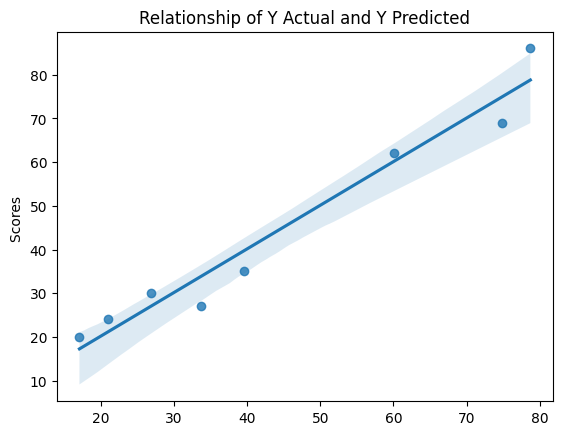

In [45]:
sns.regplot(x = yhat , y = y_test , data = df )
plt.title('Relationship of Y Actual and Y Predicted')

**In the residual plot we find there is variance in the predicted and actual values, because the goodness of fit is 0.95 which explians that the independent variable explians 95% of the dependent variable.** 

**According to the mean Squared error which iss 22.96 we can consider it as good value since it is lesser than the avarage of the Scores.**

## ANALYSING THE MODEL


In [36]:
#Analysing the model with a unseen value 

hrs = [[6.6]]

pred = lm.intercept_ + lm.coef_ * hrs

print('Score Perdicted :' , pred)

Score Perdicted : [[66.97535551]]


**In a Student studies for 6.6 Hours, his predicted score will be 66.97** 

# FINDINGS AND  CONCLUTION

1. Relationship between Study Hours and Scores:

- When students spend 4.8 hours studying, they achieve a score of 51.48.
- The correlation between study hours and scores is highly correlated, indicating a strong relationship between the two variables.
- The scatter plot suggests a positive relationship between study hours and scores, meaning that as study hours increase, scores also tend to increase.

2. Regression Model:

- The final model is given as: Scores = 2.37081538 + (9.78856669 * Hours).
- This model implies that when there is no change in study hours, the predicted score is 2.37081538.
- For every one unit increase in study hours, the score is expected to change by 9.78856669 units.

3. Residual Plot:

- The residual plot shows the difference between the predicted scores and the actual scores.
- There appears to be some variance between the predicted and actual values.
- The goodness of fit, represented as R-squared (0.95), indicates that the independent variable (study hours) explains approximately 95% of the variability in the dependent variable (scores).

4. Mean Squared Error (MSE):

- The mean squared error is calculated as 22.96.
- This value can be considered good since it is smaller than the average of the scores.
- A lower MSE suggests that the predicted scores are closer to the actual scores on average.


Overall, the analysis indicates a strong positive relationship between study hours and scores. The regression model provides an equation to predict scores based on study hours. The residual plot and MSE suggest that the model has reasonably captured the relationship but may still have some room for improvement.